In [1]:
import tensorflow as tf

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
data = load_breast_cancer()

In [ ]:
data

In [5]:
type(data)

sklearn.utils._bunch.Bunch

In [6]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
data.data.shape

(569, 30)

In [9]:
data.target.shape

(569,)

In [11]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [12]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, test_size = 0.33
)

In [14]:
N, D  = X_train.shape

In [15]:
N, D

(381, 30)

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [19]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [21]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 100)

Epoch 1/100
12/12 [==============================] - 1s 16ms/step - loss: 0.4632 - accuracy: 0.8609 - val_loss: 0.4661 - val_accuracy: 0.8404
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4204 - accuracy: 0.8924 - val_loss: 0.4284 - val_accuracy: 0.9043
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 0.3856 - accuracy: 0.9003 - val_loss: 0.3961 - val_accuracy: 0.9043
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 0.3564 - accuracy: 0.9108 - val_loss: 0.3690 - val_accuracy: 0.9202
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 0.3312 - accuracy: 0.9160 - val_loss: 0.3462 - val_accuracy: 0.9202
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 0.3103 - accuracy: 0.9265 - val_loss: 0.3267 - val_accuracy: 0.9149
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 0.2920 - accuracy: 0.9318 - val_loss: 0.3100 - val_accuracy: 0.9202
Epoch 8/100


In [22]:
print("train score: ", model.evaluate(X_train, y_train))
print("train score: ", model.evaluate(X_test, y_test))

12/12 [==============================] - 0s 1ms/step - loss: 0.0763 - accuracy: 0.9895
train score:  [0.0762682855129242, 0.9895012974739075]
6/6 [==============================] - 0s 2ms/step - loss: 0.1062 - accuracy: 0.9840
train score:  [0.1061958447098732, 0.9840425252914429]


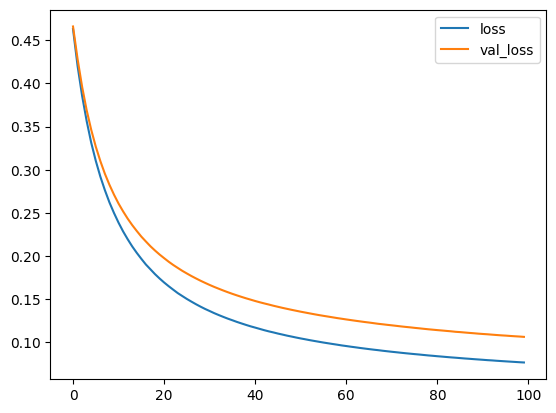

In [23]:
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

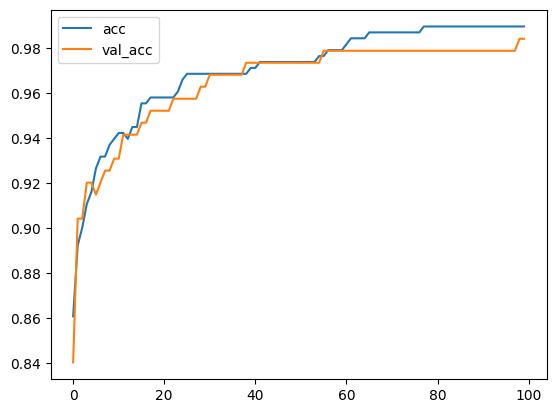

In [24]:
plt.plot(r.history['accuracy'], label = "acc")
plt.plot(r.history['val_accuracy'], label = "val_acc")
plt.legend();